In [15]:
from sklearn import datasets,model_selection
import numpy as np

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

In [16]:
# getting the value fo X and y
n_samples = 10000
D=150
X_data=np.random.normal(0,1,(n_samples,D))
r_values=[60,120,240,480]
n=10
U_initial=np.random.normal(0,np.sqrt(1/r),(n,r)) # 60x10 matrix with normal distribution
V_initial=np.random.normal(0,1/D,(D,r)) # 150x60 matrix with elemnts normally 

def getY(x,U=U_initial,V=V_initial): # this function is executed for each sample
    temp=np.matmul(V.T,x) # 60x1 matrix
    temp2=np.maximum(temp,0) # 60x1 matrix
    temp3=np.matmul(U,temp2) # 10x1 matrix
    return temp3

# defining the labels
y_data=[]
for i in range(0,len(X_data)):
    y_data.append(getY(X_data[i]))
y_data=np.array(y_data)
    
#splitting the data into trainig and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X_data, y_data, test_size=0.50, random_state=42)

# getting mini batches
def getBatch(tempX, tempY, batch_size): #Take the training data and Batch size as input
    index = np.random.randint(0, len(tempX), batch_size) #Get the random index number
    X_batch = tempX[index]
    y_batch = tempY[index]
    return X_batch,y_batch

def RModel(r):
    #Placeholders
    X = tf.placeholder(tf.float32, shape =(None, D), name = 'X' ) #Place holder for training data X
    y = tf.placeholder(tf.float32, shape =(None, n), name = 'y' ) #Place holder for training label data y
    V = tf.Variable(tf.random_normal([D,r], 0, np.sqrt(1/D), seed=42), name='V') #Initialize the Random value for theta
    U = tf.Variable(tf.random_normal([r,n], 0, np.sqrt(1/r), seed=42, name='U'))
    #Operations
    mul = tf.matmul(X, V, name='mul') # r X None
    tempy = tf.nn.relu(mul,name='tempy') 
    y_new=tf.matmul(tempy, U) # n X None
    loss = tf.losses.mean_squared_error(y, y_new) #Loss function

    learning_rate = 0.0001 # the optimum value obtained from the last experiment
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
    training_objective = optimizer.minimize(loss)

    init = tf.global_variables_initializer()


    epochs = 200
    batch_size = 10
    batches = int(np.ceil(n_samples / batch_size)) # as each epoch contains 10000 samples (n_samples=10000)

    average=[]
    with tf.Session() as sess:
        sess.run(init)

        for epoch in range(epochs):
            tempValue=0
            for i in range(batches):            
                X_batch, y_batch = getBatch(X_train, y_train, batch_size)
                sess.run(training_objective, feed_dict={X: X_batch, y: y_batch})
                loss_value = loss.eval({X: X_test, y: y_test})
                tempValue+=loss_value
                
            average.append(tempValue/batches) # getting the average mini-batch objective value for each epoch
    return average      

In [17]:
average_60=RModel(60)

In [18]:
average_120=RModel(120)

In [19]:
average_240=RModel(240)

In [20]:
average_480=RModel(480)

In [21]:
epoch_number=np.arange(1,201)

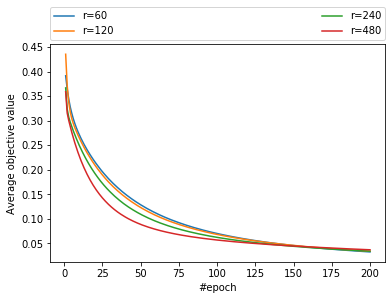

In [24]:
# plotting the values
import matplotlib.pyplot as plt
plt.xlabel('#epoch')
plt.ylabel('Average objective value')
plt.plot(epoch_number,average_60, label="r=60")
plt.plot(epoch_number,average_120, label="r=120")
plt.plot(epoch_number,average_240, label="r=240")
plt.plot(epoch_number,average_480, label="r=480")
plt.plot(figsize=(20,15))
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=2, mode="expand", borderaxespad=0.)